## I. Data Preparation

In [1]:
# Install packages if not already installed
install.packages("tidyverse")   # For data manipulation and visualization
install.packages("skimr")       # For quick overview of data
install.packages("lubridate")   # For date and time manipulation

# Load the necessary libraries
library(tidyverse)  # Includes ggplot2, dplyr, tidyr, etc.
library(skimr)      # For summarizing the dataset
library(lubridate)  # For date-time operations

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘skimr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installi

In [5]:
# Define the path to the dataset
file_path <- "/kaggle/input/walmartviz/Walmart.csv"  
# Load the dataset
walmart_data_viz <- read_csv(file_path)
head(walmart_data_viz,5) #Read the data

Rows: 10051 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Branch, City, category, unit_price, payment_method
dbl  (4): invoice_id, quantity, rating, profit_margin
date (1): date
time (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<date>,<time>,<chr>,<dbl>,<dbl>
1,WALM003,San Antonio,Health and beauty,$74.69,7,2005-01-19,13:08:00,Ewallet,9.1,0.48
2,WALM048,Harlingen,Electronic accessories,$15.28,5,2008-03-19,10:29:00,Cash,9.6,0.48
3,WALM067,Haltom City,Home and lifestyle,$46.33,7,2003-03-19,13:23:00,Credit card,7.4,0.33
4,WALM064,Bedford,Health and beauty,$58.22,8,2027-01-19,20:33:00,Ewallet,8.4,0.33
5,WALM013,Irving,Sports and travel,$86.31,7,2008-02-19,10:37:00,Ewallet,5.3,0.48


In [6]:
# Count missing values in each column
missing_values <- colSums(is.na(walmart_data_viz))

# Print the result
missing_values

# Check for duplicates
 sum(duplicated(walmart_data_viz))

invoice_id         Branch           City       category     unit_price 
             0              0              0              0             31 
      quantity           date           time payment_method         rating 
            31              0              0              0              0 
 profit_margin 
             0

[1] 51

In [7]:
# Load the dplyr package if not already loaded
library(dplyr)
# Remove rows with any NA values using drop_na
walmart_data_viz_no_na <- walmart_data_viz %>% drop_na()

# Remove duplicates and keep only unique rows
walmart_data_viz_clean <- walmart_data_viz_no_na %>% distinct()

# Remove the dollar sign and convert to numeric
unitprice <- walmart_data_viz_clean$unit_price <- as.numeric(gsub("[$,]", "", walmart_data_viz_clean$unit_price))
head(walmart_data_viz_clean)

invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<time>,<chr>,<dbl>,<dbl>
1,WALM003,San Antonio,Health and beauty,74.69,7,2005-01-19,13:08:00,Ewallet,9.1,0.48
2,WALM048,Harlingen,Electronic accessories,15.28,5,2008-03-19,10:29:00,Cash,9.6,0.48
3,WALM067,Haltom City,Home and lifestyle,46.33,7,2003-03-19,13:23:00,Credit card,7.4,0.33
4,WALM064,Bedford,Health and beauty,58.22,8,2027-01-19,20:33:00,Ewallet,8.4,0.33
5,WALM013,Irving,Sports and travel,86.31,7,2008-02-19,10:37:00,Ewallet,5.3,0.48
6,WALM026,Denton,Electronic accessories,85.39,7,2025-03-19,18:30:00,Ewallet,4.1,0.48


In [9]:
# Data Check
# Count missing values in each column
missing_values <- colSums(is.na(walmart_data_viz_clean))

# Print the result
missing_values

# Check for duplicates
 sum(duplicated(walmart_data_viz_clean))

str(walmart_data_viz_clean)

invoice_id         Branch           City       category     unit_price 
             0              0              0              0              0 
      quantity           date           time payment_method         rating 
             0              0              0              0              0 
 profit_margin 
             0

[1] 0

tibble [9,969 × 11] (S3: tbl_df/tbl/data.frame)
 $ invoice_id    : num [1:9969] 1 2 3 4 5 6 7 8 9 10 ...
 $ Branch        : chr [1:9969] "WALM003" "WALM048" "WALM067" "WALM064" ...
 $ City          : chr [1:9969] "San Antonio" "Harlingen" "Haltom City" "Bedford" ...
 $ category      : chr [1:9969] "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ unit_price    : num [1:9969] 74.7 15.3 46.3 58.2 86.3 ...
 $ quantity      : num [1:9969] 7 5 7 8 7 7 6 10 2 3 ...
 $ date          : Date[1:9969], format: "2005-01-19" "2008-03-19" ...
 $ time          : 'hms' num [1:9969] 13:08:00 10:29:00 13:23:00 20:33:00 ...
  ..- attr(*, "units")= chr "secs"
 $ payment_method: chr [1:9969] "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ rating        : num [1:9969] 9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ profit_margin : num [1:9969] 0.48 0.48 0.33 0.33 0.48 0.48 0.33 0.18 0.33 0.33 ...


In [11]:
# Adding for calculation of revenue and profit with 2 decimal places
# Calculate revenue as unit_price * quantity
walmart_data_viz_clean$revenue <- round(walmart_data_viz_clean$unit_price * walmart_data_viz_clean$quantity, 2)

# Calculate profit as revenue * profit_margin
walmart_data_viz_clean$profit <- round(walmart_data_viz_clean$revenue * walmart_data_viz_clean$profit_margin, 2)

# View the first few rows of the dataset to check the new columns
head(walmart_data_viz_clean)


invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,revenue,profit
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,WALM003,San Antonio,Health and beauty,74.69,7,2005-01-19,13:08:00,Ewallet,9.1,0.48,522.83,250.96
2,WALM048,Harlingen,Electronic accessories,15.28,5,2008-03-19,10:29:00,Cash,9.6,0.48,76.40,36.67
3,WALM067,Haltom City,Home and lifestyle,46.33,7,2003-03-19,13:23:00,Credit card,7.4,0.33,324.31,107.02
4,WALM064,Bedford,Health and beauty,58.22,8,2027-01-19,20:33:00,Ewallet,8.4,0.33,465.76,153.70
5,WALM013,Irving,Sports and travel,86.31,7,2008-02-19,10:37:00,Ewallet,5.3,0.48,604.17,290.00
6,WALM026,Denton,Electronic accessories,85.39,7,2025-03-19,18:30:00,Ewallet,4.1,0.48,597.73,286.91


In [12]:
# Ensure 'time' column is in POSIXct format (assuming 'time' is in hms format)
walmart_data_viz_clean$time <- hms(walmart_data_viz_clean$time)

# Break the 'date' column into 'year', 'month', and 'day' columns
walmart_data_viz_clean_with_period <- walmart_data_viz_clean %>%
  mutate(
    year = year(date),      # Extract the year
    month = month(date),    # Extract the month
    day = day(date),        # Extract the day
    time_of_day = case_when(
      hour(time) >= 6 & hour(time) < 12 ~ "Morning",  # 6 AM to 12 PM
      hour(time) >= 12 & hour(time) < 18 ~ "Afternoon",  # 12 PM to 6 PM
      hour(time) >= 18 & hour(time) < 24 ~ "Evening",  # 6 PM to 12 AM
      TRUE ~ "Other"  # Handles anomalies
    )
  )
# View the first few rows of the updated dataset
head(walmart_data_viz_clean_with_period)

invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,revenue,profit,year,month,day,time_of_day
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<Period>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,WALM003,San Antonio,Health and beauty,74.69,7,2005-01-19,13H 8M 0S,Ewallet,9.1,0.48,522.83,250.96,2005,1,19,Afternoon
2,WALM048,Harlingen,Electronic accessories,15.28,5,2008-03-19,10H 29M 0S,Cash,9.6,0.48,76.40,36.67,2008,3,19,Morning
3,WALM067,Haltom City,Home and lifestyle,46.33,7,2003-03-19,13H 23M 0S,Credit card,7.4,0.33,324.31,107.02,2003,3,19,Afternoon
4,WALM064,Bedford,Health and beauty,58.22,8,2027-01-19,20H 33M 0S,Ewallet,8.4,0.33,465.76,153.70,2027,1,19,Evening
5,WALM013,Irving,Sports and travel,86.31,7,2008-02-19,10H 37M 0S,Ewallet,5.3,0.48,604.17,290.00,2008,2,19,Morning
6,WALM026,Denton,Electronic accessories,85.39,7,2025-03-19,18H 30M 0S,Ewallet,4.1,0.48,597.73,286.91,2025,3,19,Evening


In [13]:
# Subsetting for analysis
# 1. Remove 1930 and 1931 from the main dataset
walmart_data_20xx <- walmart_data_viz_clean_with_period %>%
  filter(!(year %in% c(1930, 1931)))

# 2. Subset data for the years 2001-2024
walmart_data_2001_2024 <- walmart_data_20xx %>%
  filter(year >= 2001 & year <= 2024)

# 3. Subset data for the years 2025 and onwards
walmart_data_forecasts <- walmart_data_20xx %>%
  filter(year >= 2025)

# Subsetting for last 10 years
# 4. Subset data for the years 2001-2014
walmart_data_2001_2014 <- walmart_data_2001_2024 %>%
  filter(year >= 2001 & year <= 2014)

# 5. Subset data for the years 2015-2024
walmart_data_2015_2024 <- walmart_data_2001_2024 %>%
  filter(year >= 2015 & year <= 2024)

head(walmart_data_2001_2014)
head(walmart_data_2015_2024)

invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,revenue,profit,year,month,day,time_of_day
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<Period>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,WALM003,San Antonio,Health and beauty,74.69,7,2005-01-19,13H 8M 0S,Ewallet,9.1,0.48,522.83,250.96,2005,1,19,Afternoon
2,WALM048,Harlingen,Electronic accessories,15.28,5,2008-03-19,10H 29M 0S,Cash,9.6,0.48,76.40,36.67,2008,3,19,Morning
3,WALM067,Haltom City,Home and lifestyle,46.33,7,2003-03-19,13H 23M 0S,Credit card,7.4,0.33,324.31,107.02,2003,3,19,Afternoon
5,WALM013,Irving,Sports and travel,86.31,7,2008-02-19,10H 37M 0S,Ewallet,5.3,0.48,604.17,290.00,2008,2,19,Morning
9,WALM066,Grapevine,Health and beauty,36.26,2,2010-01-19,17H 15M 0S,Credit card,7.2,0.33,72.52,23.93,2010,1,19,Afternoon
11,WALM013,Irving,Fashion accessories,14.48,4,2006-02-19,18H 7M 0S,Ewallet,4.5,0.48,57.92,27.80,2006,2,19,Evening


invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,revenue,profit,year,month,day,time_of_day
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<Period>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
8,WALM100,Canyon,Home and lifestyle,73.56,10,2024-02-19,11H 38M 0S,Ewallet,8.0,0.18,735.60,132.41,2024,2,19,Morning
10,WALM065,Texas City,Food and beverages,54.84,3,2020-02-19,13H 27M 0S,Credit card,5.9,0.33,164.52,54.29,2020,2,19,Afternoon
16,WALM008,Corpus Christi,Sports and travel,93.72,6,2015-01-19,16H 19M 0S,Cash,4.5,0.48,562.32,269.91,2015,1,19,Afternoon
19,WALM053,Conroe,Food and beverages,54.67,3,2021-01-19,18H 0M 0S,Credit card,8.6,0.57,164.01,93.49,2021,1,19,Evening
23,WALM083,Farmers Branch,Home and lifestyle,33.20,2,2015-03-19,12H 20M 0S,Credit card,4.4,0.33,66.40,21.91,2015,3,19,Afternoon
24,WALM067,Haltom City,Electronic accessories,34.56,5,2017-02-19,11H 15M 0S,Ewallet,9.9,0.33,172.80,57.02,2017,2,19,Morning


## II. Analysis & Visualization

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


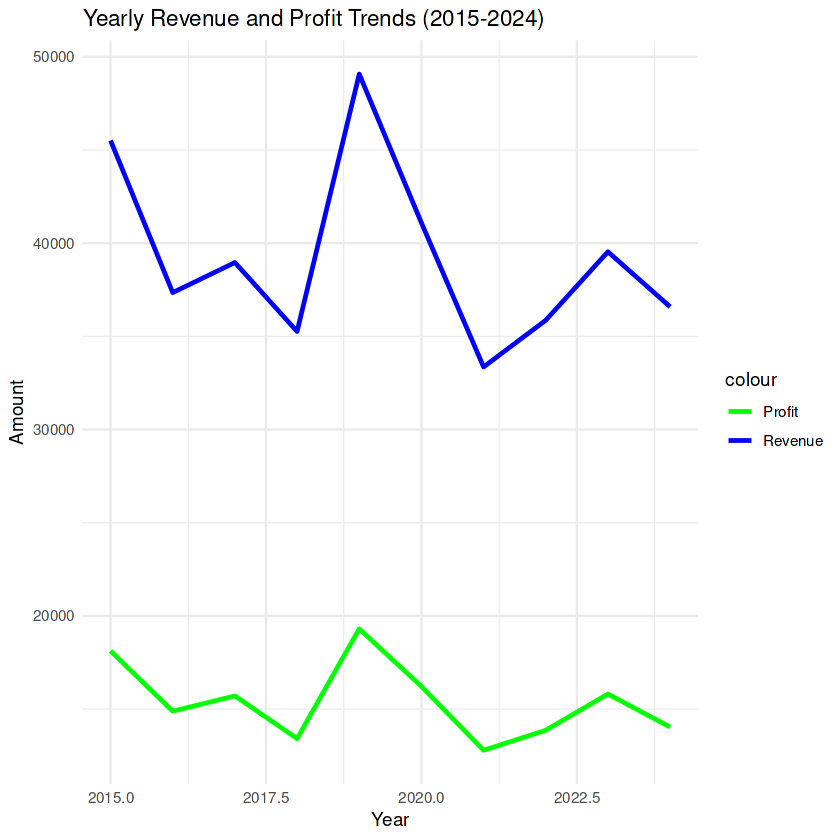

In [15]:
# Line chart of revenue and profit trends
library(ggplot2)

yearly_trends <- walmart_data_2015_2024 %>%
  group_by(year) %>%
  summarize(
    total_revenue = sum(revenue, na.rm = TRUE),
    total_profit = sum(profit, na.rm = TRUE)
  )

ggplot(yearly_trends, aes(x = year)) +
  geom_line(aes(y = total_revenue, color = "Revenue"), size = 1) +
  geom_line(aes(y = total_profit, color = "Profit"), size = 1) +
  labs(title = "Yearly Revenue and Profit Trends (2015-2024)", x = "Year", y = "Amount") +
  scale_color_manual(values = c("Revenue" = "blue", "Profit" = "green")) +
  theme_minimal()


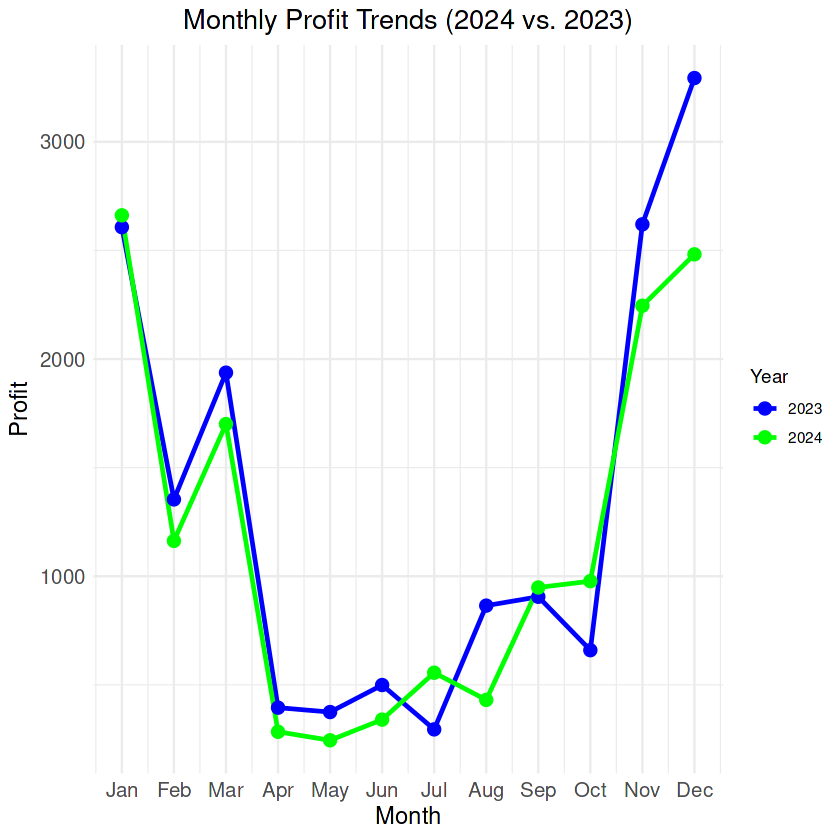

In [22]:
# Line chart of monthly profit change for 2024 vs. 2023
library(ggplot2)

# Filter and group data for 2023 and 2024 by month
monthly_profit_trends <- walmart_data_2015_2024 %>%
  filter(year %in% c(2023, 2024)) %>%  # Filter for 2023 and 2024
  group_by(year, month) %>%            # Group by year and month
  summarize(
    total_profit = sum(profit, na.rm = TRUE),  # Calculate total profit
    .groups = "drop"
  )

# Plot the profit trends
ggplot(monthly_profit_trends, aes(x = month, y = total_profit, group = year, color = as.factor(year))) +
  geom_line(size = 1) +
  geom_point(size = 3) +
  labs(
    title = "Monthly Profit Trends (2024 vs. 2023)",
    x = "Month",
    y = "Profit",
    color = "Year"
  ) +
  scale_x_continuous(breaks = 1:12, labels = month.abb) +  # Display month abbreviations
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  ) +
  scale_color_manual(values = c("2023" = "blue", "2024" = "green"))


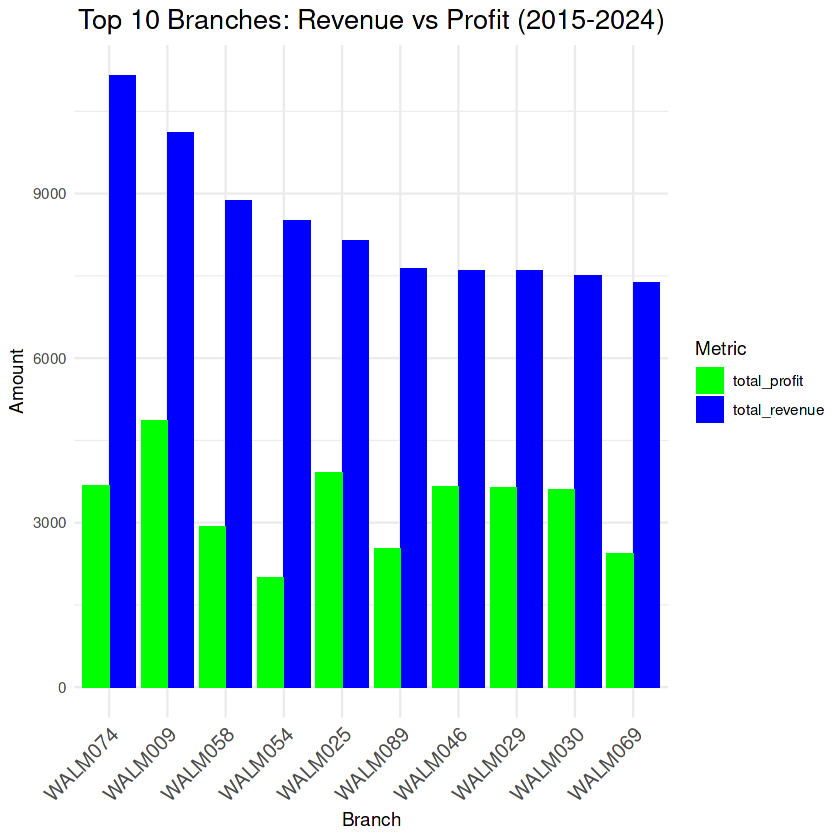

In [25]:
# Reshape the data for a clustered bar chart and ensure proper ordering of Branch
top_10_branch_long <- top_10_branch_data %>%
  pivot_longer(
    cols = c(total_revenue, total_profit),
    names_to = "Metric",
    values_to = "Amount"
  ) %>%
  mutate(Branch = factor(Branch, levels = top_10_branch_data$Branch))  # Ensure Branch is ordered by total_revenue

# Plot the clustered bar chart
ggplot(top_10_branch_long, aes(x = Branch, y = Amount, fill = Metric)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(
    title = "Top 10 Branches: Revenue vs Profit (2015-2024)",
    x = "Branch",
    y = "Amount",
    fill = "Metric"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    plot.title = element_text(hjust = 0.5, size = 16)
  ) +
  scale_fill_manual(values = c("total_revenue" = "blue", "total_profit" = "green"))


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


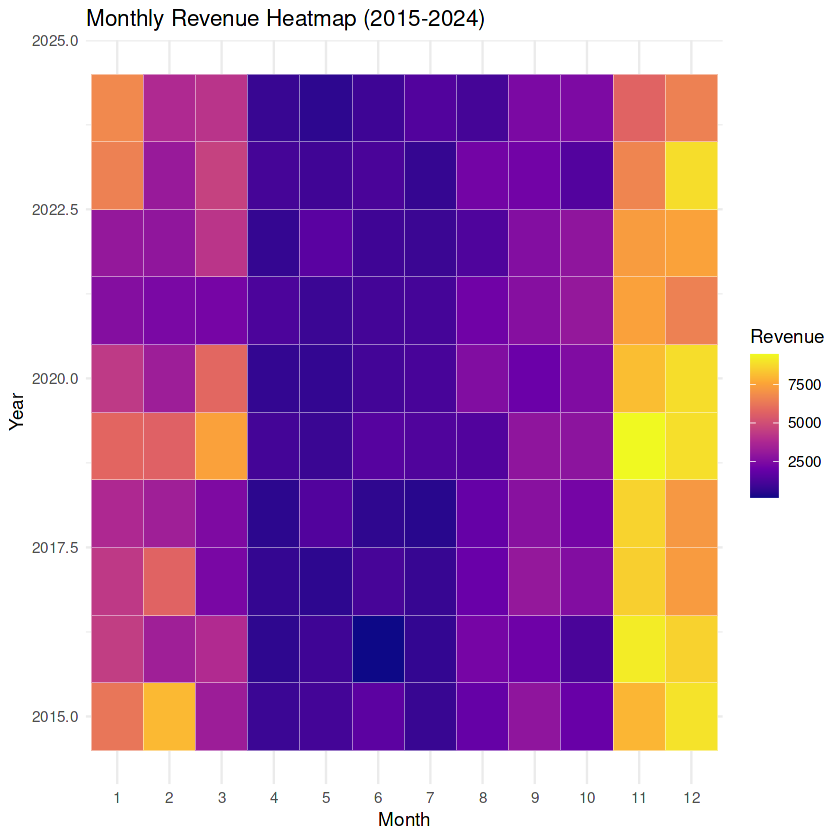

In [17]:
monthly_revenue <- walmart_data_2015_2024 %>%
  group_by(year, month) %>%
  summarize(total_revenue = sum(revenue, na.rm = TRUE))

ggplot(monthly_revenue, aes(x = factor(month, levels = 1:12), y = year, fill = total_revenue)) +
  geom_tile(color = "white") +
  scale_fill_viridis_c(option = "plasma") +
  labs(title = "Monthly Revenue Heatmap (2015-2024)", x = "Month", y = "Year", fill = "Revenue") +
  theme_minimal()


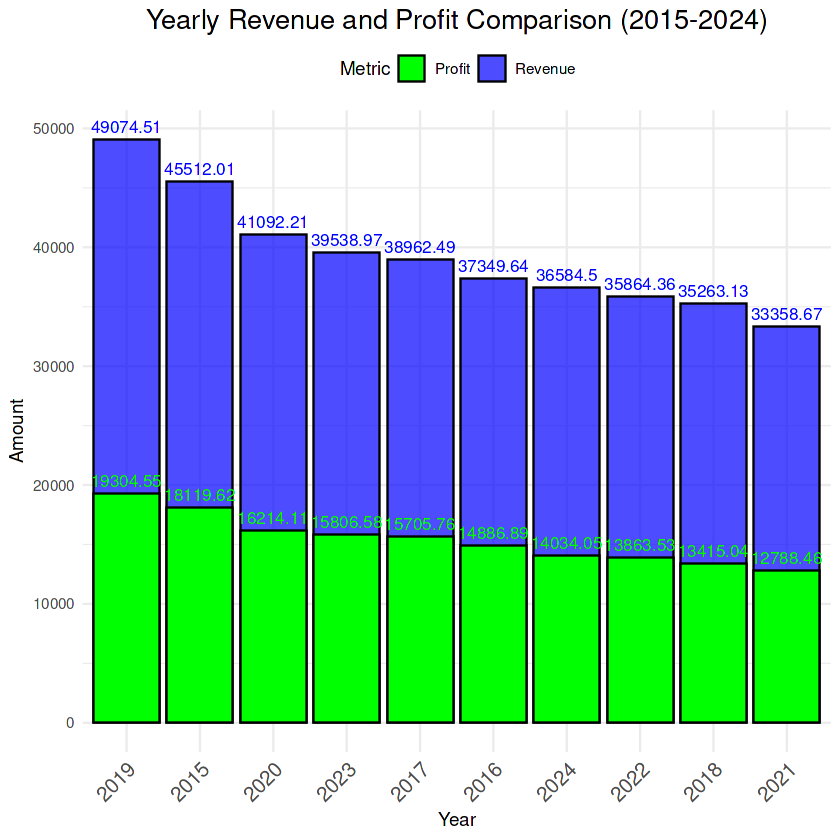

In [27]:
library(ggplot2)
library(dplyr)

# Summarize yearly revenue and profit
yearly_summary <- walmart_data_2015_2024 %>%
  group_by(year) %>%
  summarize(
    total_revenue = sum(revenue, na.rm = TRUE),
    total_profit = sum(profit, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  arrange(desc(total_profit))  # Arrange in descending order of profit

# Stacked bar chart
ggplot(yearly_summary, aes(x = reorder(as.factor(year), -total_profit), y = total_revenue, fill = "Revenue")) +
  geom_bar(stat = "identity", color = "black", alpha = 0.7) +
  geom_bar(aes(y = total_profit, fill = "Profit"), stat = "identity", color = "black") +
  scale_fill_manual(values = c("Revenue" = "blue", "Profit" = "green")) +
  labs(
    title = "Yearly Revenue and Profit Comparison (2015-2024)",
    x = "Year",
    y = "Amount",
    fill = "Metric"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    plot.title = element_text(hjust = 0.5, size = 16),
    legend.position = "top"
  ) +
  geom_text(aes(y = total_revenue, label = round(total_revenue, 2)), vjust = -0.5, size = 3.5, color = "blue") +
  geom_text(aes(y = total_profit, label = round(total_profit, 2)), vjust = -0.5, size = 3.5, color = "green")


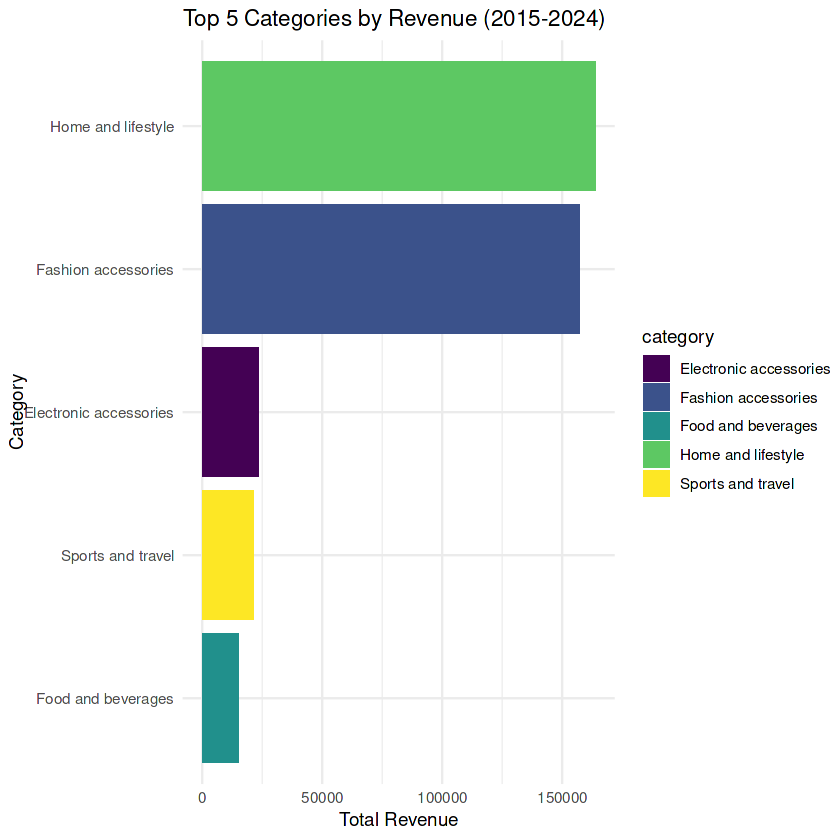

In [18]:
top_categories <- walmart_data_2015_2024 %>%
  group_by(category) %>%
  summarize(total_revenue = sum(revenue, na.rm = TRUE)) %>%
  arrange(desc(total_revenue)) %>%
  slice_head(n = 5)

ggplot(top_categories, aes(x = reorder(category, total_revenue), y = total_revenue, fill = category)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Top 5 Categories by Revenue (2015-2024)", x = "Category", y = "Total Revenue") +
  theme_minimal() +
  scale_fill_viridis_d()


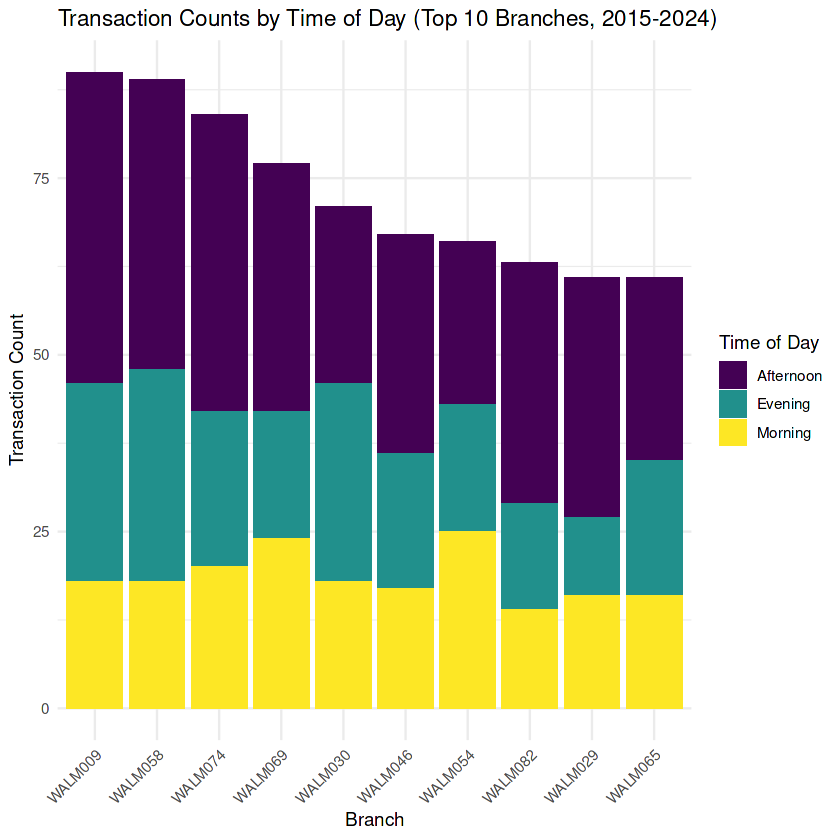

In [28]:
# Summarize transaction count by Branch and time_of_day
time_of_day_transactions <- walmart_data_2015_2024 %>%
  group_by(Branch, time_of_day) %>%
  summarize(transaction_count = n(), .groups = "drop") %>%
  group_by(Branch) %>% 
  summarize(total_transactions = sum(transaction_count), .groups = "drop") %>%
  arrange(desc(total_transactions)) %>%
  slice_head(n = 10)  # Select top 10 branches

# Filter the original data for only the top 10 branches
filtered_data <- walmart_data_2015_2024 %>%
  filter(Branch %in% time_of_day_transactions$Branch) %>%
  group_by(Branch, time_of_day) %>%
  summarize(transaction_count = n(), .groups = "drop")

# Create the plot
ggplot(filtered_data, aes(x = reorder(Branch, -transaction_count), y = transaction_count, fill = time_of_day)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Transaction Counts by Time of Day (Top 10 Branches, 2015-2024)", 
       x = "Branch", 
       y = "Transaction Count") +
  theme_minimal() +
  scale_fill_viridis_d(name = "Time of Day") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


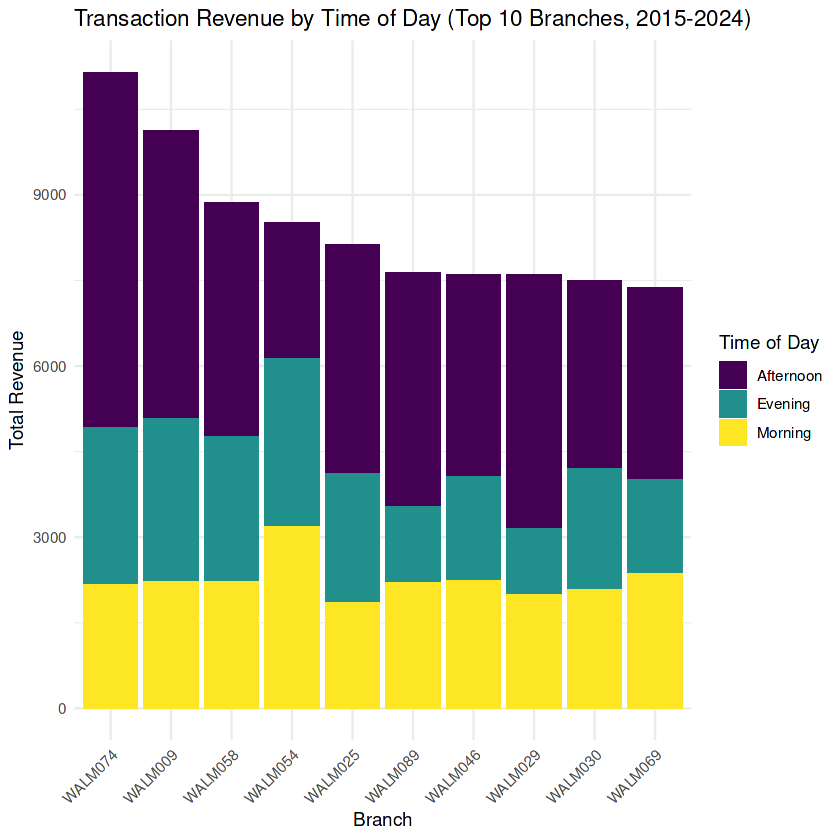

In [30]:
# Summarize revenue by Branch and time_of_day (morning, afternoon, evening)
time_of_day_revenue <- walmart_data_2015_2024 %>%
  group_by(Branch, time_of_day) %>%
  summarize(total_revenue = sum(revenue, na.rm = TRUE), .groups = "drop") %>%
  group_by(Branch) %>% 
  summarize(total_revenue_per_branch = sum(total_revenue), .groups = "drop") %>%
  arrange(desc(total_revenue_per_branch)) %>%
  slice_head(n = 10)  # Select top 10 branches

# Filter the original data for only the top 10 branches
filtered_data_revenue <- walmart_data_2015_2024 %>%
  filter(Branch %in% time_of_day_revenue$Branch) %>%
  group_by(Branch, time_of_day) %>%
  summarize(total_revenue = sum(revenue, na.rm = TRUE), .groups = "drop")

# Create the plot for Revenue by Time of Day for Top 10 Branches
ggplot(filtered_data_revenue, aes(x = reorder(Branch, -total_revenue), y = total_revenue, fill = time_of_day)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Transaction Revenue by Time of Day (Top 10 Branches, 2015-2024)", 
       x = "Branch", 
       y = "Total Revenue") +
  theme_minimal() +
  scale_fill_viridis_d(name = "Time of Day") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


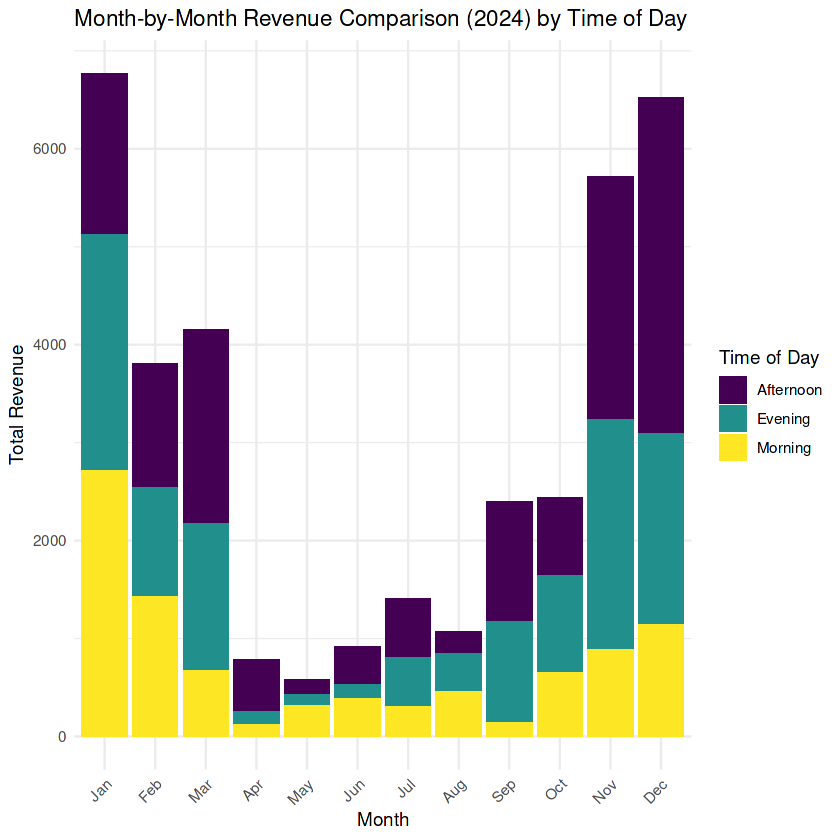

In [31]:
# Filter data for 2024 and summarize revenue by month and time_of_day
monthly_shift_revenue_2024 <- walmart_data_2015_2024 %>%
  filter(year == 2024) %>%
  group_by(month, time_of_day) %>%
  summarize(total_revenue = sum(revenue, na.rm = TRUE), .groups = "drop")

# Create the plot for Month-by-Month Revenue Comparison in All 3 Shifts
ggplot(monthly_shift_revenue_2024, aes(x = factor(month, levels = 1:12), y = total_revenue, fill = time_of_day)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Month-by-Month Revenue Comparison (2024) by Time of Day", 
       x = "Month", 
       y = "Total Revenue") +
  scale_x_discrete(labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) +
  scale_fill_viridis_d(name = "Time of Day") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


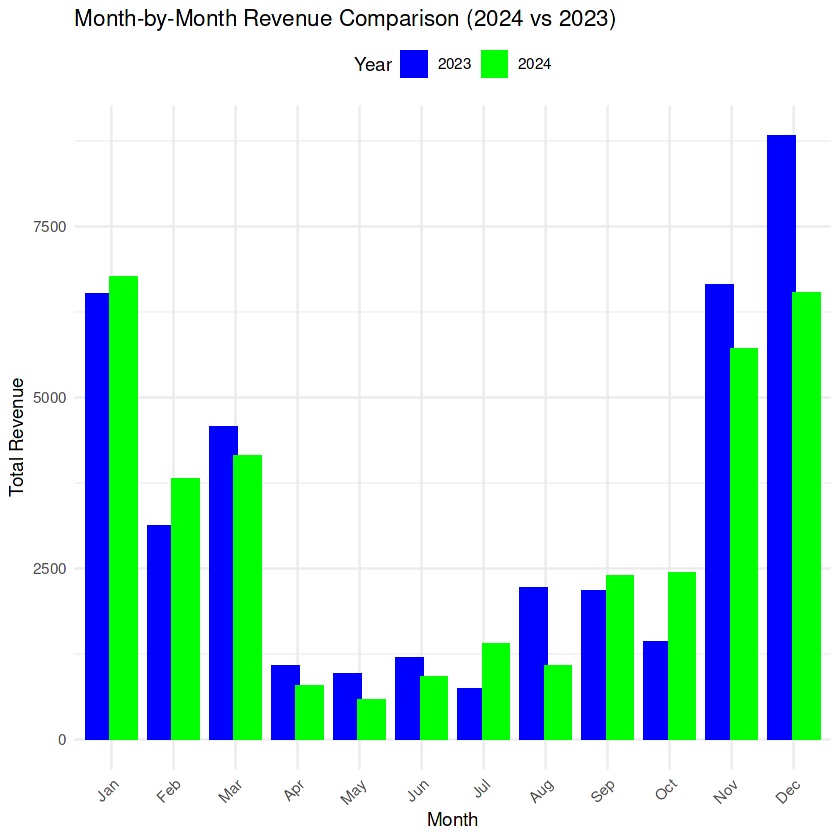

In [33]:
# Filter data for both 2023 and 2024, and summarize total revenue by month (excluding time_of_day)
monthly_revenue_comparison <- walmart_data_2015_2024 %>%
  filter(year %in% c(2023, 2024)) %>%
  group_by(year, month) %>%
  summarize(total_revenue = sum(revenue, na.rm = TRUE), .groups = "drop")

# Create the plot for Month-by-Month Revenue Comparison (2024 vs 2023) without shifts
ggplot(monthly_revenue_comparison, aes(x = factor(month, levels = 1:12), y = total_revenue, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  labs(title = "Month-by-Month Revenue Comparison (2024 vs 2023)", 
       x = "Month", 
       y = "Total Revenue") +
  scale_x_discrete(labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) +
  scale_fill_manual(values = c("2023" = "blue", "2024" = "green"), name = "Year") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(legend.position = "top")


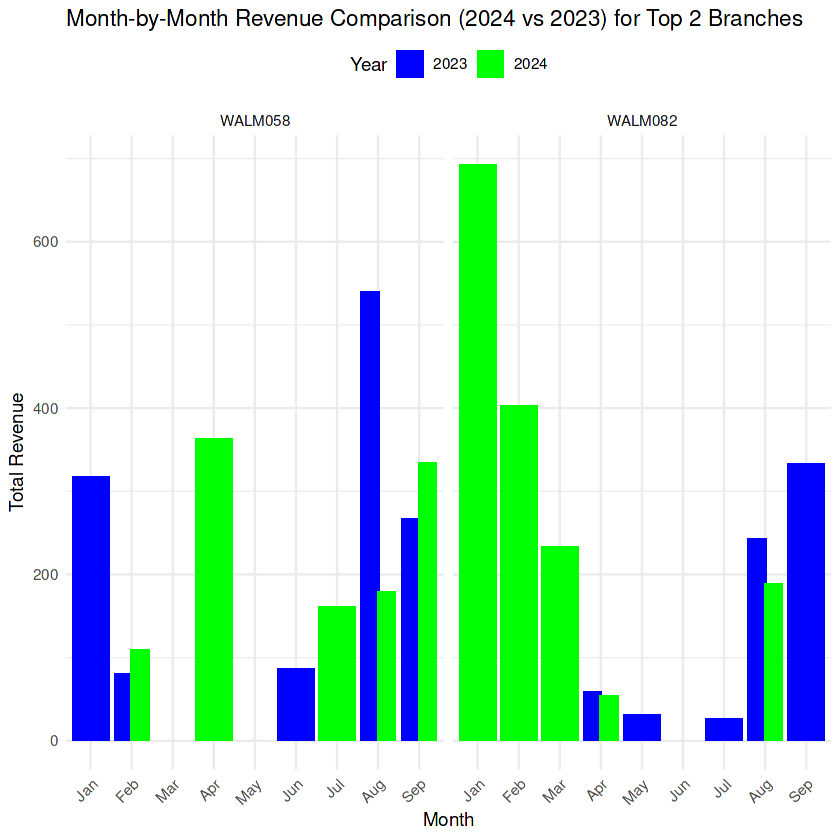

In [34]:
# Summarize total revenue by branch, year, and month
branch_revenue_summary <- walmart_data_2015_2024 %>%
  filter(year %in% c(2023, 2024)) %>%
  group_by(Branch, year, month) %>%
  summarize(total_revenue = sum(revenue, na.rm = TRUE), .groups = "drop")

# Calculate the total revenue by branch over the two years (2023 and 2024)
top_branches <- branch_revenue_summary %>%
  group_by(Branch) %>%
  summarize(total_revenue_2023_2024 = sum(total_revenue, na.rm = TRUE), .groups = "drop") %>%
  arrange(desc(total_revenue_2023_2024)) %>%
  slice_head(n = 2)  # Select the top 2 branches

# Filter the original data for only the top 2 branches
monthly_revenue_comparison_top_2 <- branch_revenue_summary %>%
  filter(Branch %in% top_branches$Branch)

# Create the plot for Month-by-Month Revenue Comparison (2024 vs 2023) for top 2 branches
ggplot(monthly_revenue_comparison_top_2, aes(x = factor(month, levels = 1:12), y = total_revenue, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  facet_wrap(~ Branch) +  # Create separate plots for each branch
  labs(title = "Month-by-Month Revenue Comparison (2024 vs 2023) for Top 2 Branches", 
       x = "Month", 
       y = "Total Revenue") +
  scale_x_discrete(labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) +
  scale_fill_manual(values = c("2023" = "blue", "2024" = "green"), name = "Year") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(legend.position = "top")


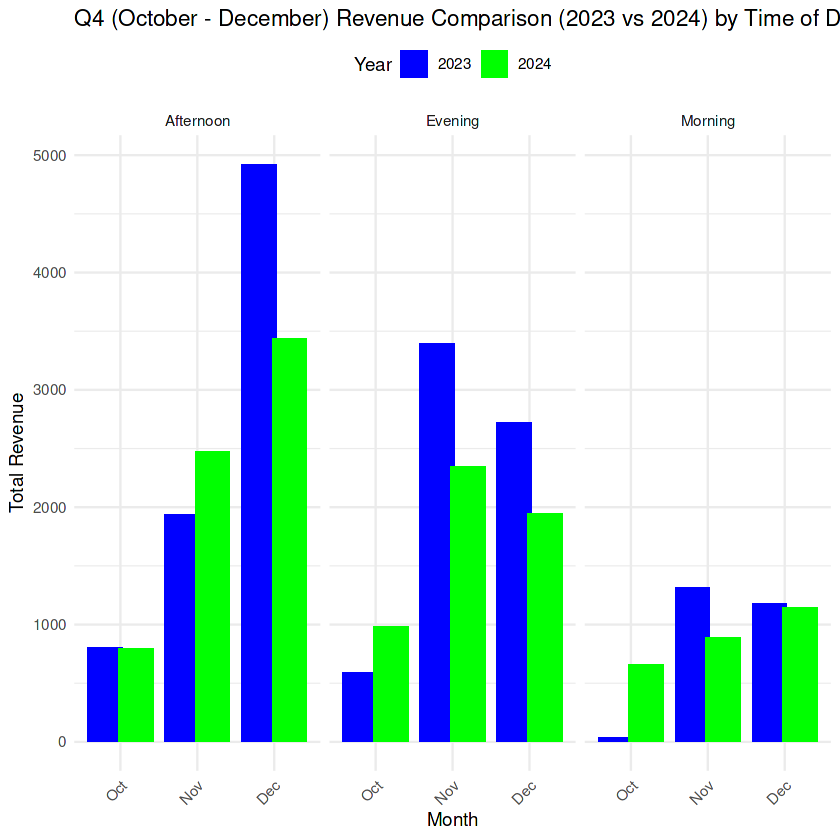

In [35]:
# Filter data for Q4 (October, November, December) for 2023 and 2024
quarter_revenue_comparison <- walmart_data_2015_2024 %>%
  filter(year %in% c(2023, 2024), month %in% 10:12) %>%
  group_by(year, month, time_of_day) %>%
  summarize(total_revenue = sum(revenue, na.rm = TRUE), .groups = "drop")

# Create the plot for Q4 (October to December) Revenue Comparison for 2023 and 2024 by time of day
ggplot(quarter_revenue_comparison, aes(x = factor(month, levels = 10:12), y = total_revenue, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  facet_wrap(~ time_of_day) +  # Create separate plots for each time of day (Morning, Afternoon, Evening)
  labs(title = "Q4 (October - December) Revenue Comparison (2023 vs 2024) by Time of Day", 
       x = "Month", 
       y = "Total Revenue") +
  scale_x_discrete(labels = c("Oct", "Nov", "Dec")) +
  scale_fill_manual(values = c("2023" = "blue", "2024" = "green"), name = "Year") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(legend.position = "top")


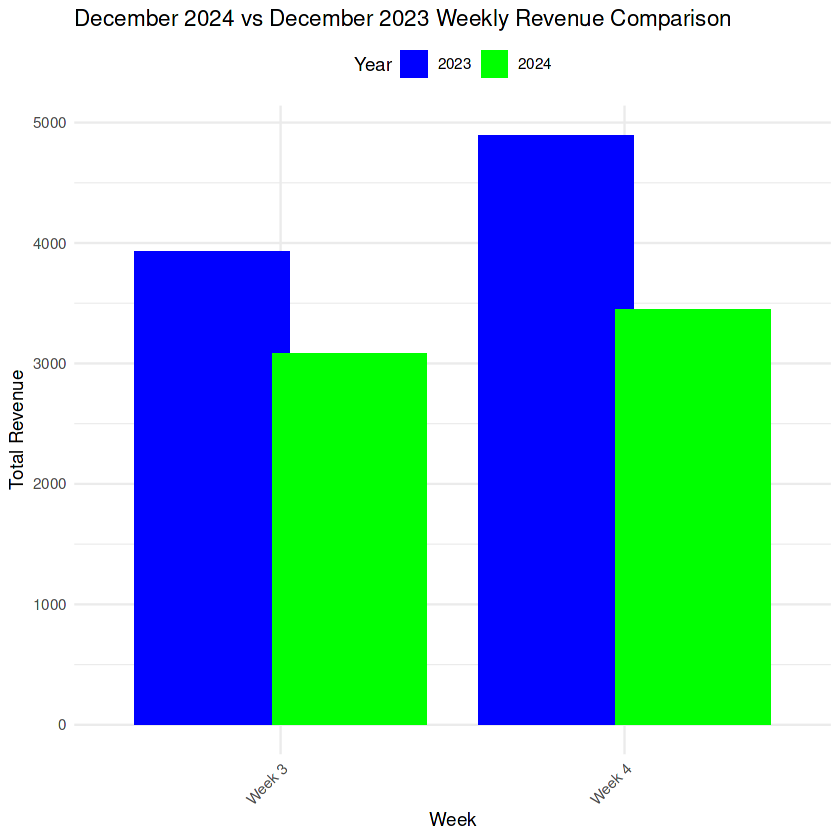

In [36]:
# Filter data for December 2023 and 2024
december_revenue_comparison <- walmart_data_2015_2024 %>%
  filter(year %in% c(2023, 2024), month == 12) %>%
  # Add a week number to split December into 4 weeks
  mutate(week = case_when(
    day %in% 1:7 ~ "Week 1",    # 1st to 7th December
    day %in% 8:14 ~ "Week 2",   # 8th to 14th December
    day %in% 15:21 ~ "Week 3",  # 15th to 21st December
    day %in% 22:31 ~ "Week 4",  # 22nd to 31st December
    TRUE ~ "Other"
  )) %>%
  group_by(year, week) %>%
  summarize(total_revenue = sum(revenue, na.rm = TRUE), .groups = "drop")

# Create the plot for Week-by-Week Revenue Comparison for December 2023 and 2024
ggplot(december_revenue_comparison, aes(x = week, y = total_revenue, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  labs(title = "December 2024 vs December 2023 Weekly Revenue Comparison", 
       x = "Week", 
       y = "Total Revenue") +
  scale_fill_manual(values = c("2023" = "blue", "2024" = "green"), name = "Year") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(legend.position = "top")


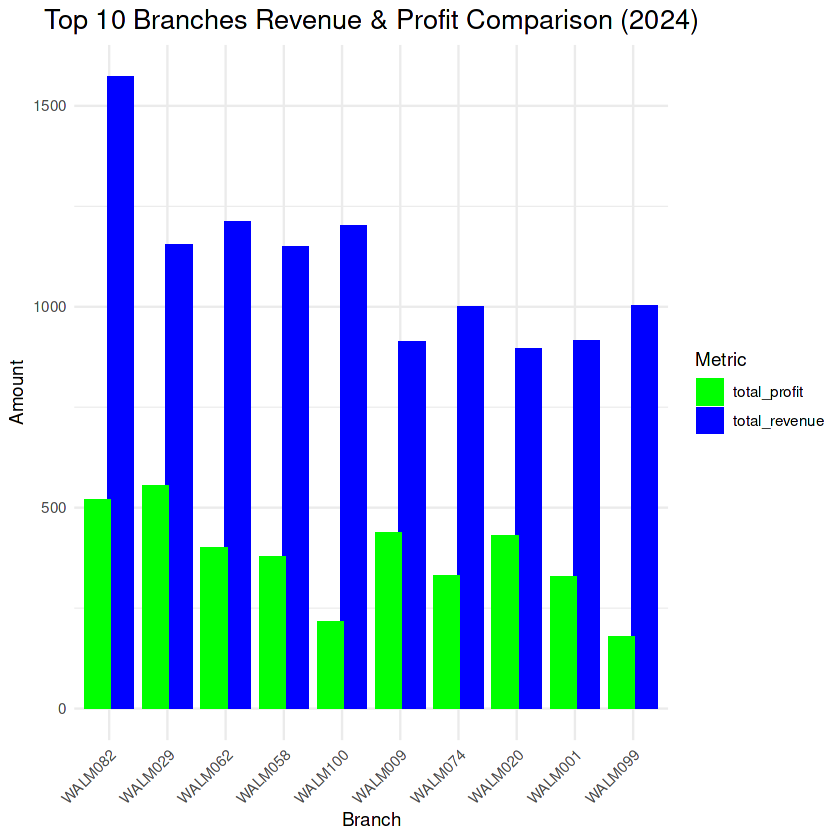

In [41]:
# Filter data for 2024 and summarize revenue and profit by Branch
top_10_branches_data <- walmart_data_2015_2024 %>%
  filter(year == 2024) %>%
  group_by(Branch) %>%
  summarize(
    total_revenue = sum(revenue, na.rm = TRUE),
    total_profit = sum(profit, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  arrange(desc(total_revenue)) %>%
  slice_head(n = 10)  # Select top 10 branches by revenue

# Reshape data to a long format for clustered bar chart
top_10_branches_long <- top_10_branches_data %>%
  pivot_longer(
    cols = c(total_revenue, total_profit),
    names_to = "Metric",
    values_to = "Amount"
  )

# Create a clustered bar chart for Revenue and Profit comparison for Top 10 branches
ggplot(top_10_branches_long, aes(x = reorder(Branch, -Amount), y = Amount, fill = Metric)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  labs(
    title = "Top 10 Branches Revenue & Profit Comparison (2024)",
    x = "Branch",
    y = "Amount",
    fill = "Metric"
  ) +
  scale_fill_manual(values = c("total_revenue" = "blue", "total_profit" = "green")) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5, size = 16)
  )
